# About The Data
We'll be using the Adult Dataset from kaggle for this lab, but feel free to follow along with your own dataset. The dataset contains the following attributes:

    age
    workclass
    fnlwgt
    education
    education_num
    marital_status
    occupation
    relationship
    race
    sex
    capital_gain
    capital_loss
    hours_per_week
    native_country
    income
    
Our goal is to predict whether income exceeds $50k/yr based on census data

In [1]:
# Importing numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# My practical code
# Import warnings to ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing rcParams
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [4]:
# Example code from pdf
# Load data into pandas DataFrame
adult_df = pd.read_csv('adult.csv', header = None)
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
                    'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
                    'income']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# My practical code
# call .tail() to see the bottom of the data
adult_df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# Example code from pdf
# Check any missing values
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# My practical code
# Another way to check any missing values
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
# Example code from pdf
# Separate the variable into categoricals and numericals
categoricals = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
numericals = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [9]:
# Example code from pdf
# Begin exploring the categorical variables
# .head()
adult_df[categoricals].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [10]:
# My practical code
# See both head and tail of the data
adult_df[categoricals]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


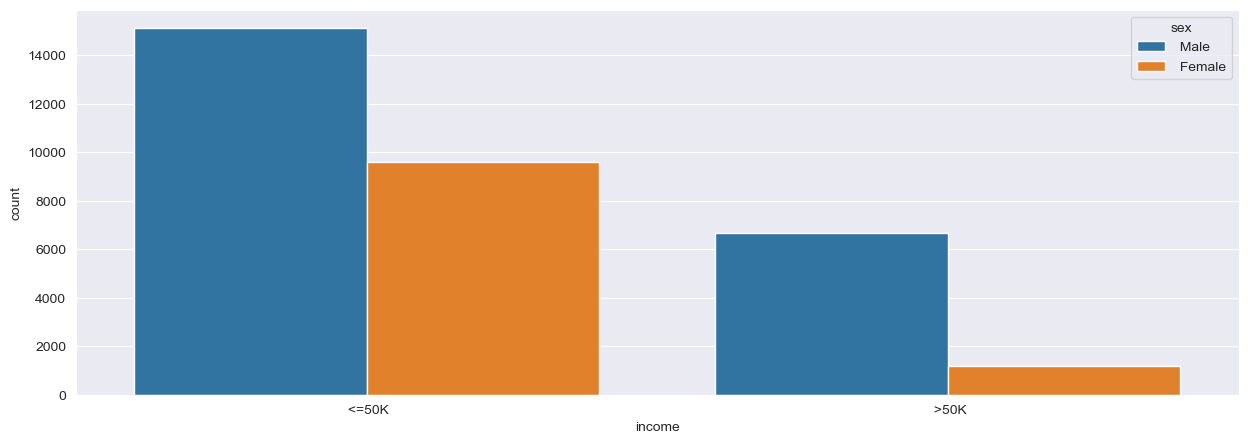

In [11]:
# Example code from pdf
# create countplot for income with hue = 'sex'
sns.countplot(x = adult_df['income'], hue = 'sex', data = adult_df)
plt.show()

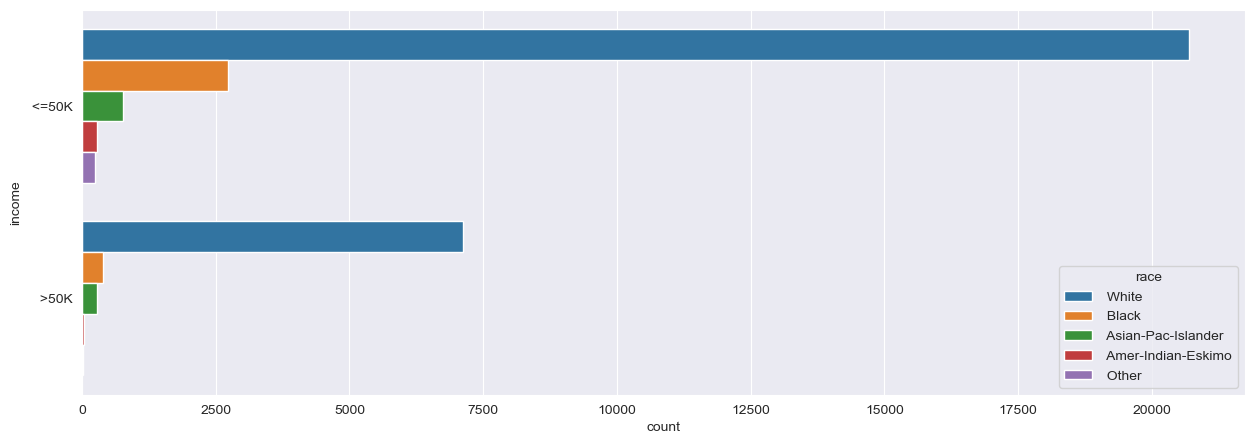

In [12]:
# Example code from pdf
# create countplot for income with hue = 'race'
# Flip to horizontally 
sns.countplot(y = adult_df['income'], hue = 'race', data = adult_df)
plt.show()

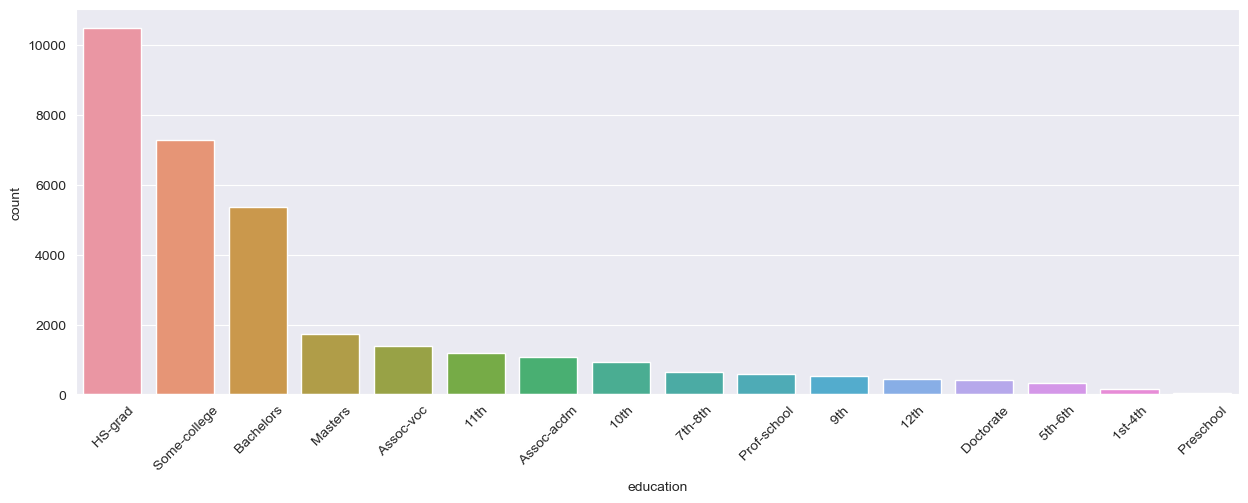

In [13]:
# Example code from pdf
# order = is an optional parameter, which is just sorting the bars in this case.
sns.countplot(x = adult_df['education'], order = adult_df['education'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

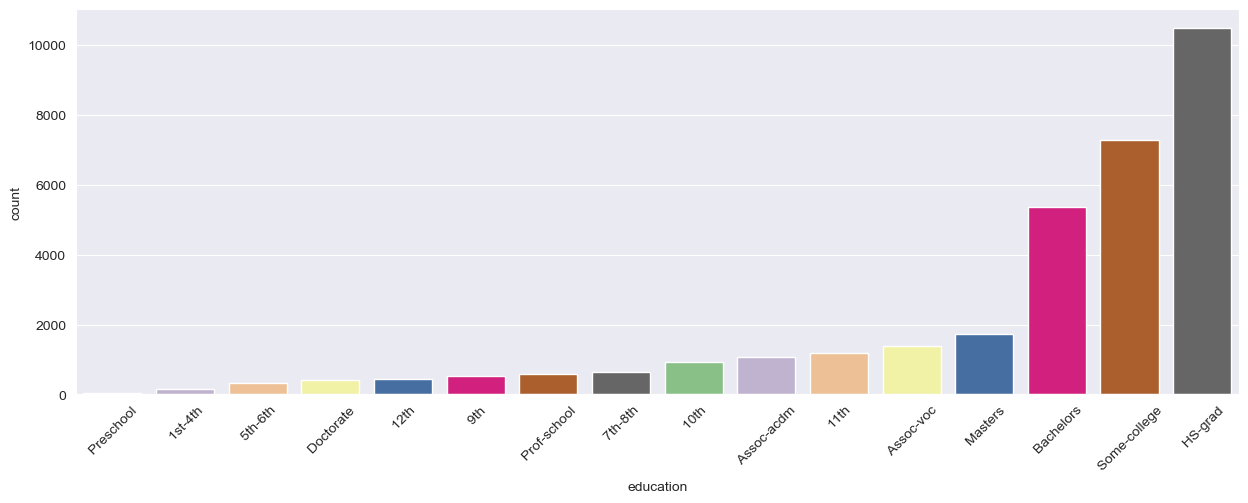

In [14]:
# My practical code
# Reverse the order and change colors
sns.countplot(x = adult_df['education'], order = adult_df['education'].value_counts().index[::-1], palette = 'Accent')
plt.xticks(rotation = 45)
plt.show()

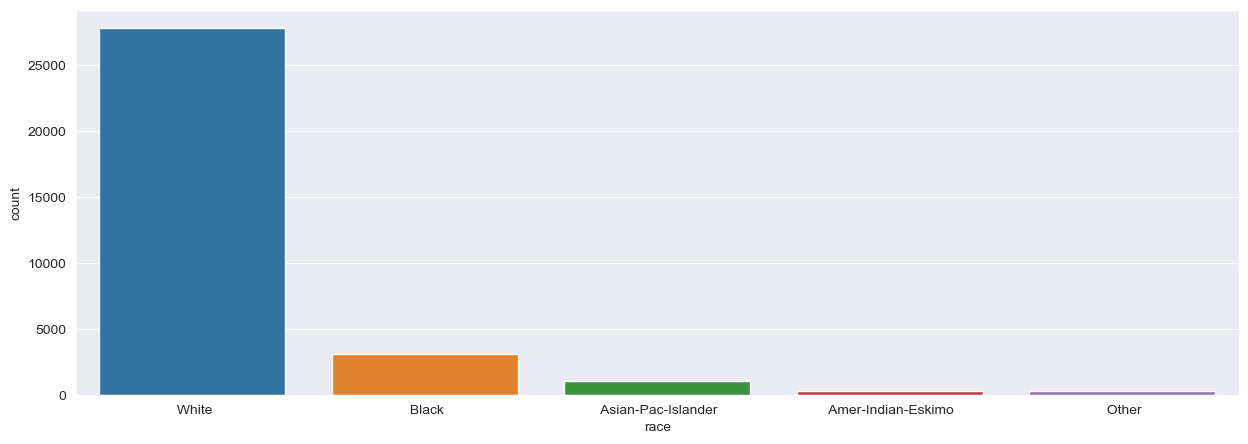

In [15]:
# Example code from pdf
# See how many counts of each race in dataset
sns.countplot(x = adult_df['race'], data = adult_df)
plt.show()

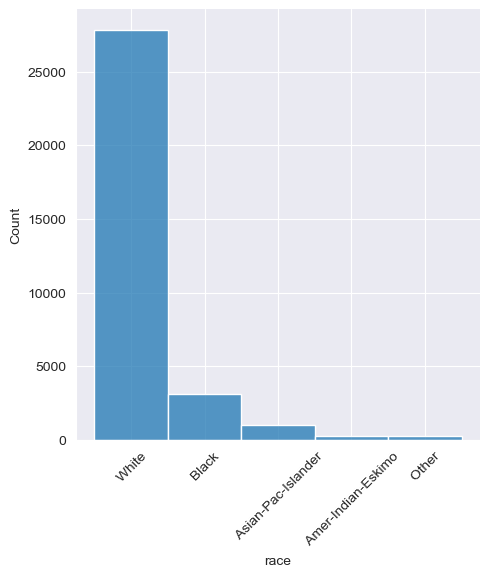

In [16]:
# My practical code
# Few modifications
sns.displot(x = adult_df['race'], data = adult_df)
plt.xticks(rotation = 45)
plt.show()

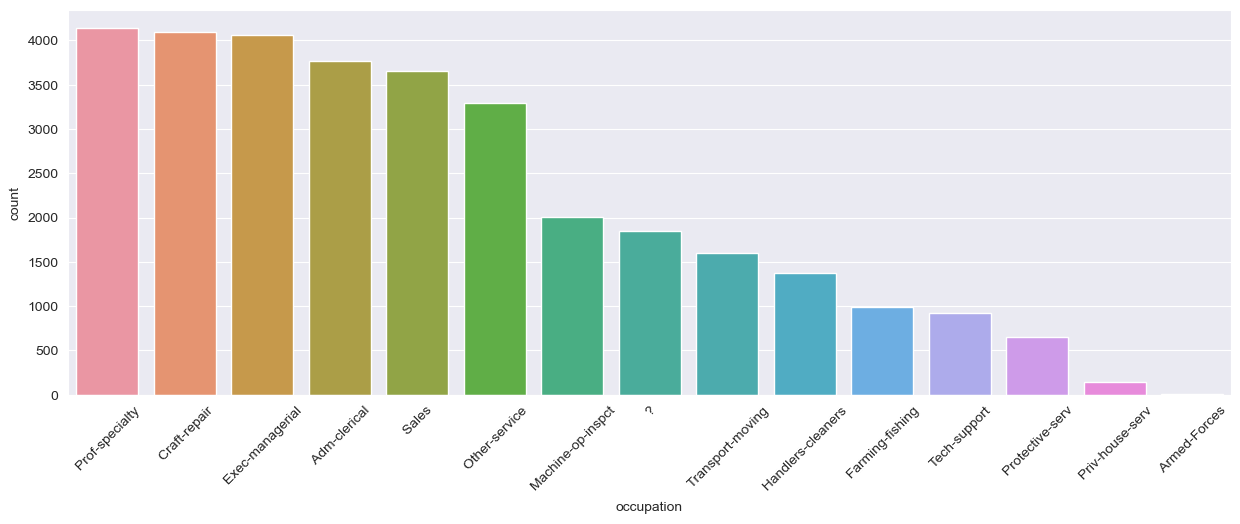

In [17]:
# Example code from pdf
# See countplot for occupation
sns.countplot(x = adult_df['occupation'], data = adult_df, order = adult_df['occupation'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

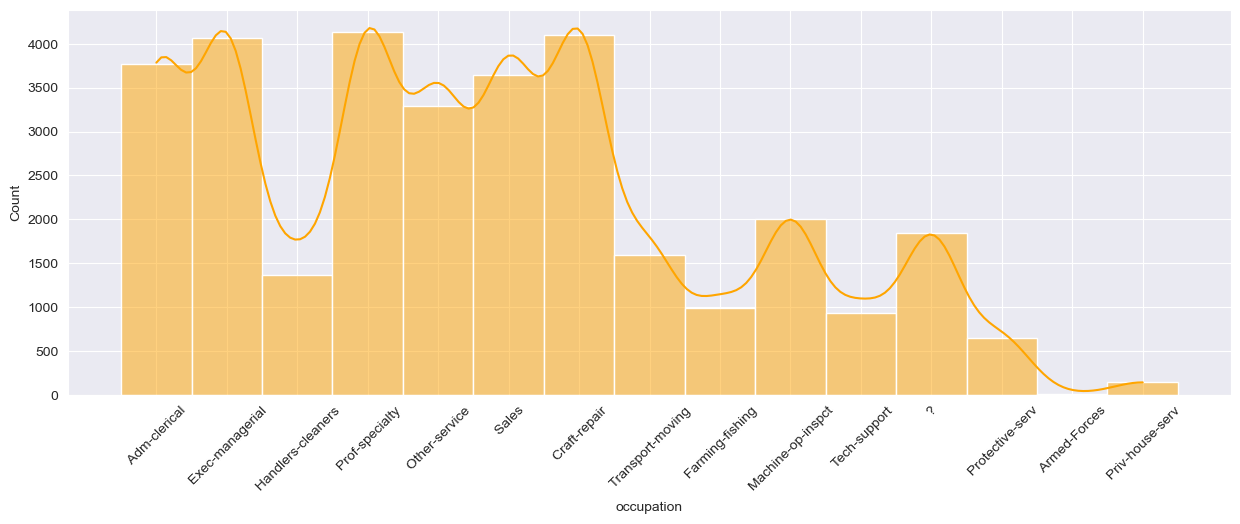

In [18]:
# My practical code
# Using histplot with some modifications
sns.histplot(x = adult_df['occupation'], data = adult_df, kde = True, color = "Orange")
plt.xticks(rotation = 45)
plt.show()

In [19]:
# Example code from pdf
# Replace the '?' with np.NaN
adult_df['workclass'] = adult_df['workclass'].replace(' ?', np.NaN)
adult_df['occupation'] = adult_df['occupation'].replace(' ?', np.NaN)
adult_df['native_country'] = adult_df['native_country'].replace(' ?', np.NaN)

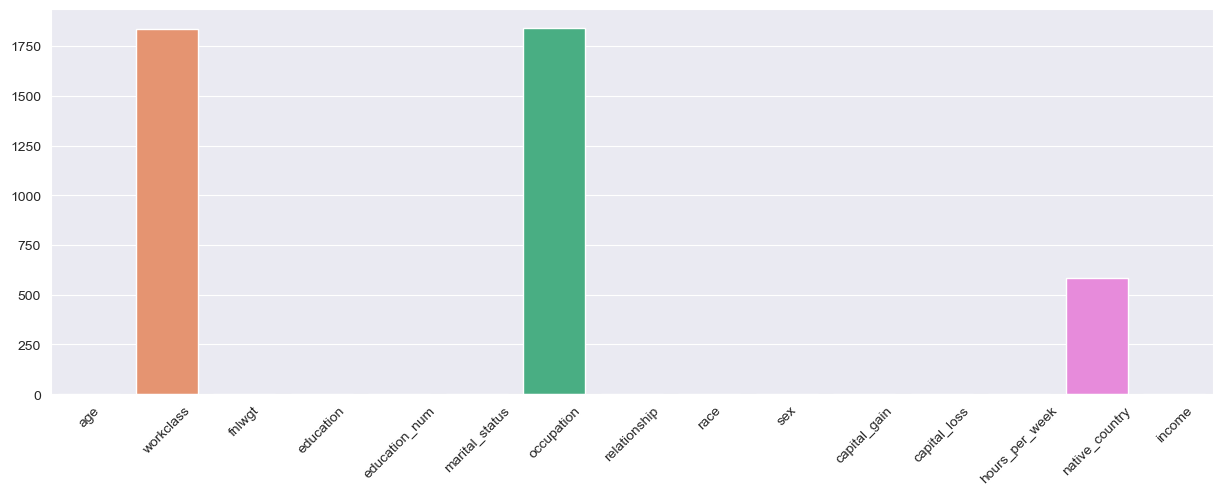

In [20]:
# Example code from pdf
# Create barplot to see null values
sns.barplot(x = adult_df.columns, y = adult_df.isnull().sum().values)
plt.xticks(rotation = 45)
plt.show()

In [21]:
# My practical code
# See if the missing values show up in .info()
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [22]:
# Example code from pdf
# Now let's explore the numerical values
# .head()
adult_df[numericals].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [23]:
# My practical code
# head(7) and tail(7)
print(adult_df[numericals].head(7))
print(adult_df[numericals].tail(7))

   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40
5   37  284582             14             0             0              40
6   49  160187              5             0             0              16
       age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
32554   53  321865             14             0             0              40
32555   22  310152             10             0             0              40
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910

In [24]:
# Example code from pdf
# loop through every variables and print a note if columns contains ' ?'
for variable in numericals:
    if not adult_df[adult_df[variable] == ' ?'].empty:
        print(f'{variable} contains missing values ( ?)')

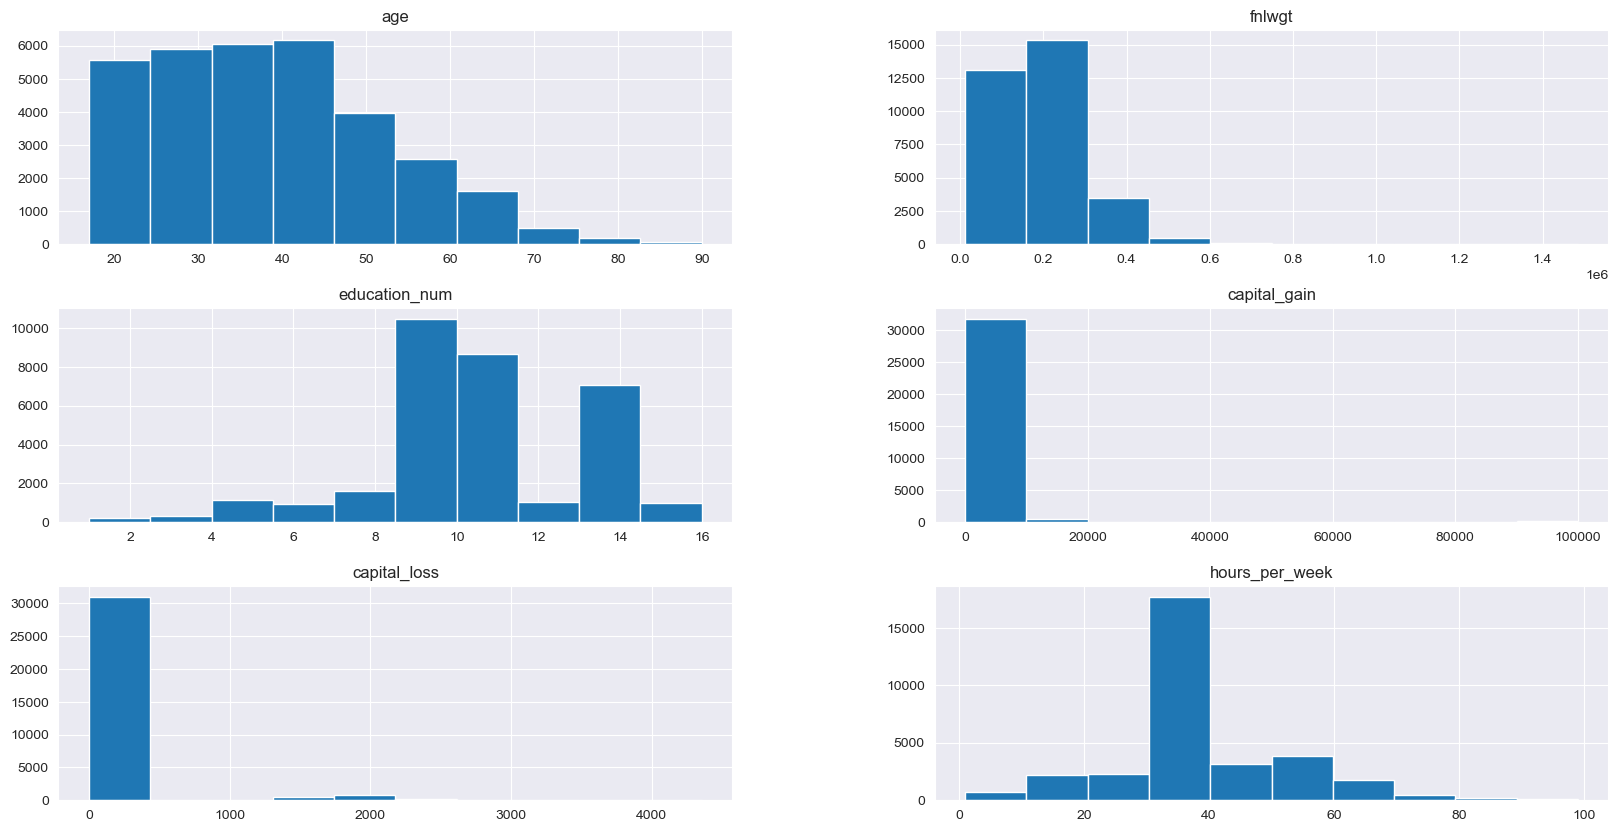

In [25]:
# Example code from pdf
# see the distributions of our numerical variables in histogram
adult_df[numericals].hist(figsize = (20, 10))
plt.show()

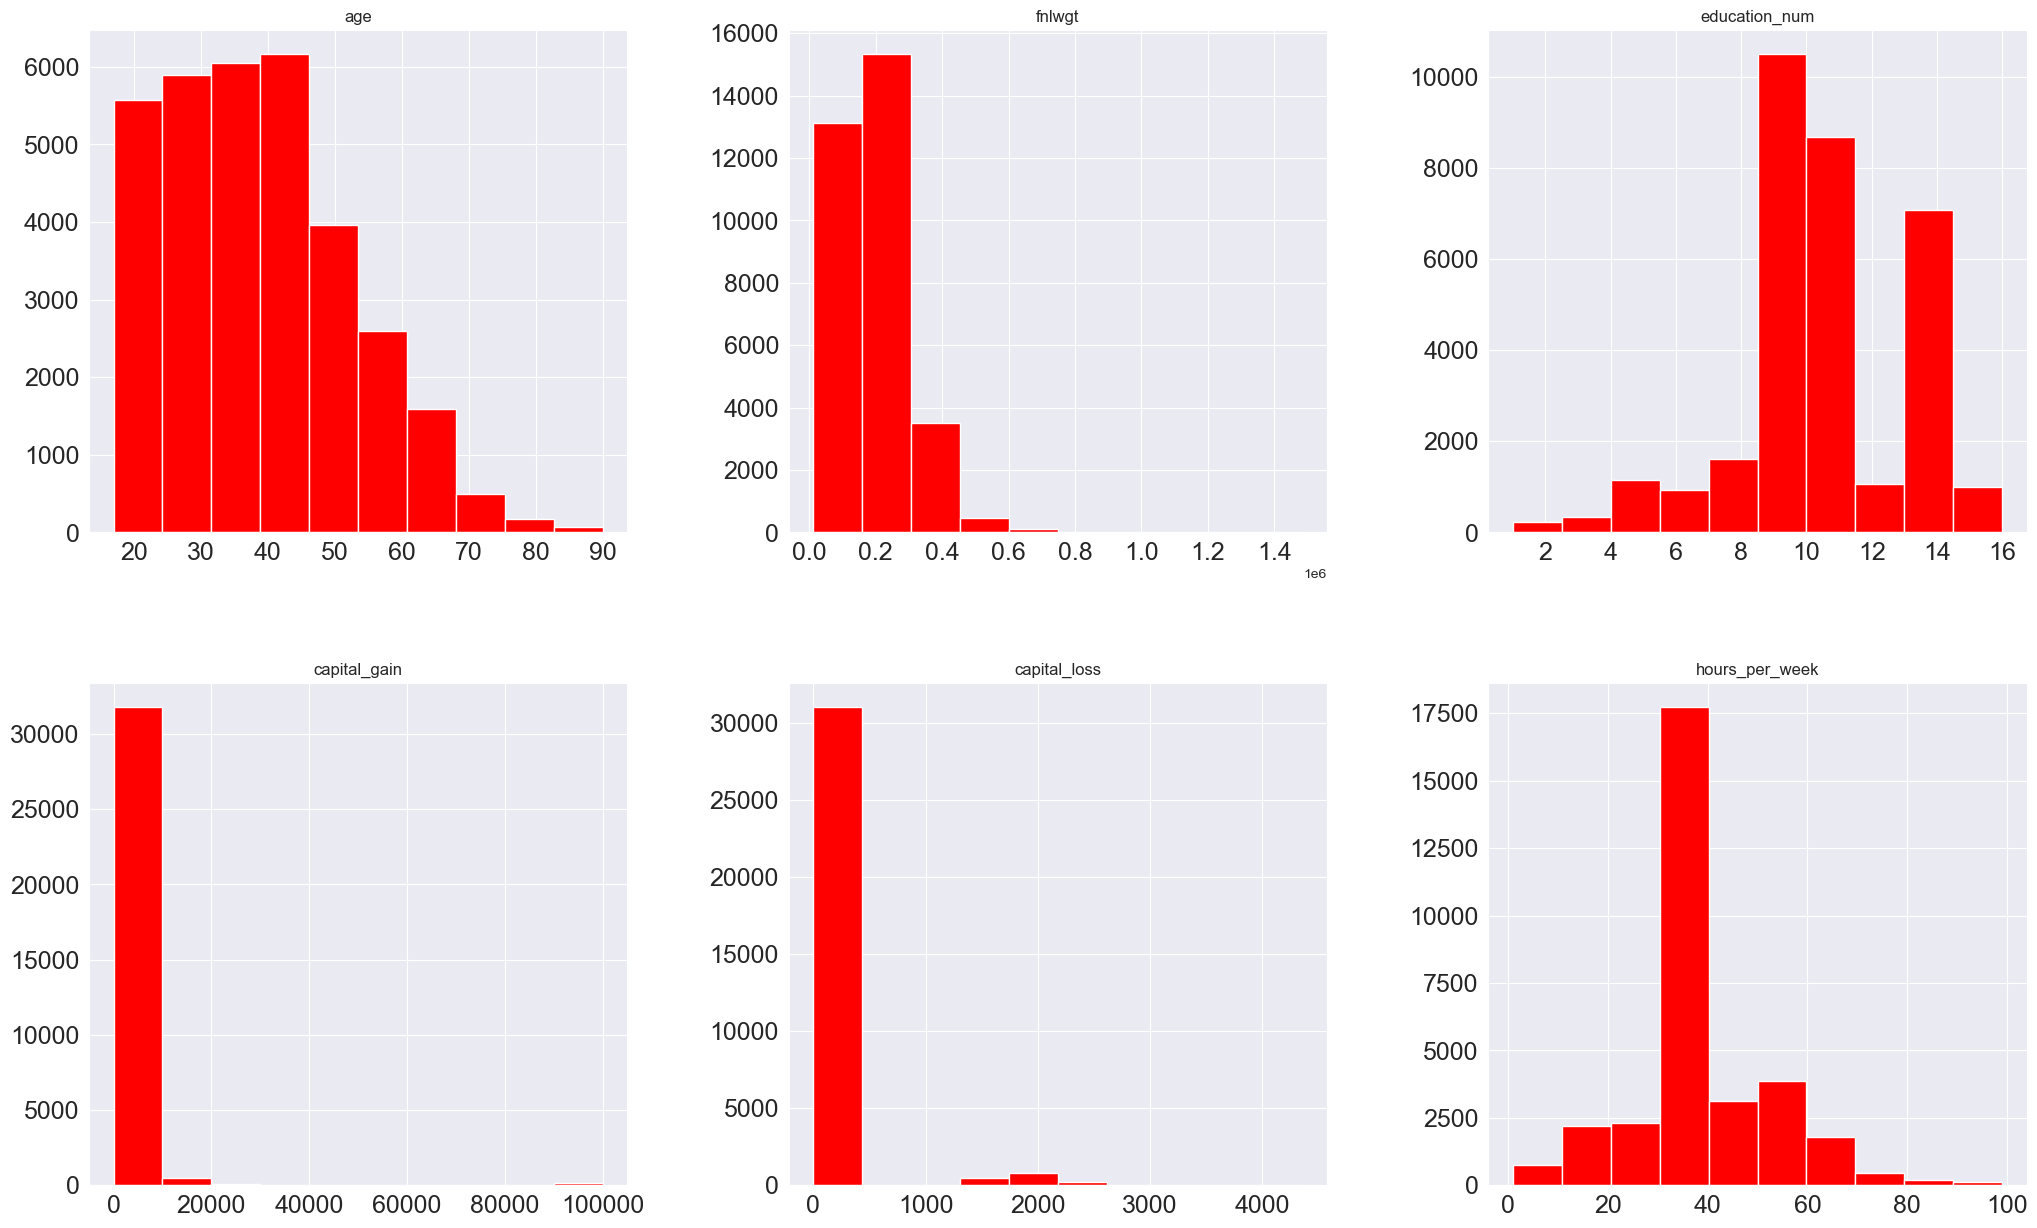

In [26]:
# My practical code
# modify few things
adult_df[numericals].hist(xlabelsize = 18, ylabelsize = 18, layout = (2, 3), figsize = (25, 15), color = "red")
plt.show()

# Pre-Processing
We'll first take care of the missing categorical values. One option is to replace the missing values with the most frequent/mode, which we'll do below. However, options for dealing with missing categorical variables include:

Remove observations with missing values if we are dealing with a large dataset and the number of records containing missing values are few.
Remove the variable/column if it is not significant.
Develop a model to predict missing values. KNN for example.
Replace missing values with the most frequent in that column.

In [27]:
# Example code from pdf
# Replace missing value with .mode()
adult_df['workclass'].fillna(adult_df['workclass'].mode()[0], inplace = True)
adult_df['occupation'].fillna(adult_df['occupation'].mode()[0], inplace = True)
adult_df['native_country'].fillna(adult_df['native_country'].mode()[0], inplace = True)

In [28]:
# My practical code 
# We can do a quicker way by a for loop
adult_df_col = ['workclass', 'occupation', 'native_country']
for c in adult_df_col:
    adult_df[c].fillna(adult_df[c].mode()[0], inplace = True)

In [29]:
# Example code from pdf
# Enocde these categories by using dummies
adult_df = pd.get_dummies(data = adult_df, columns = categoricals, drop_first = True)

In [30]:
# Example code from pdf
# call .head() to see the data of the first 5
adult_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# My practical code 
# call .tail()
adult_df.tail()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
32556,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32560,52,287927,9,15024,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [32]:
# Example code from pdf
# Importing RobustScaler
# Map variables onto the same scale
from sklearn.preprocessing import RobustScaler

# all columns except our target column for x
X = adult_df.drop('income_ >50K', axis = 1)
y = adult_df['income_ >50K']

# create our scaler object
scaler = RobustScaler()
# use our scaler object to transform/scale our data and save it into X_scaled. Only need to
# transform numerical data.
X_scaled = scaler.fit_transform(X[numericals])
# reassign X[numericals] to the transformed numerical data.
X[numericals] = X_scaled

In [33]:
# My practical code
# Target 'capital_gain'
# all columns except our target column for x
X2 = adult_df.drop('education_ Bachelors', axis = 1)
y2 = adult_df['education_ Bachelors']

# create our scaler2 object
scaler2 = RobustScaler()
# use our scaler2 object to transform/scale our data and save it into X_scaled2. Only need to
# transform numerical data.
X_scaled2 = scaler2.fit_transform(X2[numericals])
# reassign X2[numericals] to the transformed numerical data.
X2[numericals] = X_scaled2

In [34]:
# Example code from pdf
# call .head() for X
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# My practical code
# call .head() for X2
X2.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Creating our Model
We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's train_test_split(X, y, test_size) function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [36]:
# Example code from pdf
# Importing train_test_split
# Begin creating and training our model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [37]:
# Example code from pdf
# Importing GaussianNB
from sklearn.naive_bayes import GaussianNB

# instantiate the model to train a GaussianNB Navie Bayes classifier
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [38]:
# My practical code
# Lets try a KNN classifier to compare with GaussianNB
# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Model Evaluation
Now that we've finished training, we can make predictions off of the test data and evaluate our model's performance using the corresponding test data labels (y_test).

In [39]:
# Example code from pdf
# Predictions from test data
y_pred = gnb.predict(X_test)

In [40]:
# My practical code
# For Knn predictions
knn_y_pred = knn.predict(X_test)

In [41]:
# Example code from pdf
# Importing accuracy_score
# Check accuracy score
from sklearn.metrics import accuracy_score

print ('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8254


In [42]:
# My practical code
# Check accuracy score from knn
print ('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, knn_y_pred)))

Model accuracy score: 0.8466


In [43]:
# Example code from pdf
# Compare the train set and test set accuracy
y_pred_train = gnb.predict(X_train)

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8252
Test set score: 0.8254


In [44]:
# My practical code
# Compare the train set and test set accuracy from knn
knn_y_pred_train = knn.predict(X_train)

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8985
Test set score: 0.8466


In [45]:
# Example code from pdf
# Print the confusion matrix results
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[6343 1037]
 [ 669 1720]]

True Positives(TP) =  6343

True Negatives(TN) =  1720

False Positives(FP) =  1037

False Negatives(FN) =  669


In [46]:
# My practical code
# Print the confusion matrix results from knn

cm = confusion_matrix(y_test, knn_y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[6715  665]
 [ 834 1555]]

True Positives(TP) =  6715

True Negatives(TN) =  1555

False Positives(FP) =  665

False Negatives(FN) =  834


In [47]:
# Example code from pdf
# Importing classification_report
# Print the classification result
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7380
           1       0.62      0.72      0.67      2389

    accuracy                           0.83      9769
   macro avg       0.76      0.79      0.77      9769
weighted avg       0.84      0.83      0.83      9769



In [48]:
# My practical code
# Print the classification result from knn
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7380
           1       0.70      0.65      0.67      2389

    accuracy                           0.85      9769
   macro avg       0.79      0.78      0.79      9769
weighted avg       0.84      0.85      0.84      9769



In [49]:
# Example code from pdf
# Perform k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

# Applying 10-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring = 'accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.83421053 0.83245614 0.8174638  0.82799473 0.82316806 0.81921896
 0.81878017 0.82755595 0.81219833 0.83369899]

Average cross-validation score: 0.8247


In [50]:
# My practical code
# Perform k-Fold Cross Validation from knn

# Applying 10-Fold Cross Validation
scores2 = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
print('Cross-validation scores:{}'.format(scores2))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores2.mean()))

Cross-validation scores:[0.86096491 0.85526316 0.8530057  0.85037297 0.86265906 0.85168934
 0.83852567 0.86309785 0.8411584  0.86353664]

Average cross-validation score: 0.8540
